In [28]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from api_keys import football_com

In [29]:
api_key = f'&APIkey={football_com}'
action = 'action=get_countries'
url = f'https://apiv3.apifootball.com/?{action}{api_key}'

response = requests.get(url)

In [3]:
# England Premier League Teams Info

league = 152
action = f'action=get_teams&league_id={league}'
url = f'https://apiv3.apifootball.com/?{action}{api_key}'

teams_response = requests.get(url).json()
teams_df = pd.DataFrame(teams_response)

In [5]:
player_count = 0
for i, players in enumerate(teams_response):
    player_count += len(teams_response[i]['players'])
player_count

668

In [30]:
player_data = []

for i, teams in enumerate(teams_response):
    team_name = teams_response[i]['team_name']
    for players in teams['players']:
        player_name = players['player_name']
        player_type = players['player_type']
        player_age = players['player_age']
        player_match_played = players['player_match_played']
        player_goals = players['player_goals']
        player_yellow_cards = players['player_yellow_cards']
        player_red_cards = players['player_red_cards']
        player_assists = players['player_assists']
        player_shots_total = players['player_shots_total']
        player_goals_conceded = players['player_goals_conceded']
        player_fouls_committed = players['player_fouls_committed']
        player_tackles = players['player_tackles']
        player_blocks = players['player_blocks']
#         player_crosses_total = players['player_crosses_total']
        player_interceptions = players['player_interceptions']
        player_clearances = players['player_clearances']
        player_saves = players['player_saves']
        player_passes = players['player_passes']
        player_passes_accuracy = players['player_passes_accuracy']
        
        
        player_data.append({
            'Team Name':team_name,
            'Player Name':player_name,
            'Player Type':player_type,
            'Player Age':player_age,
            'Matches Played':player_match_played,
            'Goals':player_goals,
            'Yellow Cards':player_yellow_cards,
            'Red Cards':player_red_cards,
            'Fouls':player_fouls_committed,
            'Assists':player_assists,
            'Shots on Goal':player_shots_total,
            'Goals Conceded':player_goals_conceded,
            'Tackles':player_tackles,
            'Blocks':player_blocks,
            'Interceptions':player_interceptions,
            'Saves':player_saves,
            'Passes':player_passes,
            'Accurate Passes':player_passes_accuracy
        })
player_df = pd.DataFrame(player_data)
player_df.to_csv('output/players.csv')
player_df.head()

,Team Name,Player Name,Player Type,Player Age,Matches Played,Goals,Yellow Cards,Red Cards,Fouls,Assists,Shots on Goal,Goals Conceded,Tackles,Blocks,Interceptions,Saves,Passes,Accurate Passes
0,Manchester City,S. Ortega,Goalkeepers,30,1,0,0,0,,0,,0,,,,2,43,39
1,Manchester City,Ederson,Goalkeepers,29,34,0,3,0,1,1,,31,3,,1,43,1068,904
2,Manchester City,S. Carson,Goalkeepers,37,0,0,0,0,,0,,0,,,,,,
3,Manchester City,K. Walker,Defenders,32,24,0,3,0,11,0,4,0,12,2,16,,1535,1369
4,Manchester City,Rúben Dias,Defenders,26,26,0,3,0,19,0,7,0,21,13,18,,2071,1920


In [31]:
cols = player_df.columns.drop(['Team Name', 'Player Name', 'Player Type'])
player_df[cols] = player_df[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
player_df.head()

,Team Name,Player Name,Player Type,Player Age,Matches Played,Goals,Yellow Cards,Red Cards,Fouls,Assists,Shots on Goal,Goals Conceded,Tackles,Blocks,Interceptions,Saves,Passes,Accurate Passes
0,Manchester City,S. Ortega,Goalkeepers,30,1,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,2.0,43.0,39.0
1,Manchester City,Ederson,Goalkeepers,29,34,0,3,0,1.0,1,0.0,31.0,3.0,0.0,1.0,43.0,1068.0,904.0
2,Manchester City,S. Carson,Goalkeepers,37,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Manchester City,K. Walker,Defenders,32,24,0,3,0,11.0,0,4.0,0.0,12.0,2.0,16.0,0.0,1535.0,1369.0
4,Manchester City,Rúben Dias,Defenders,26,26,0,3,0,19.0,0,7.0,0.0,21.0,13.0,18.0,0.0,2071.0,1920.0


In [32]:
ages = player_df['Player Age'].unique()
buckets = [0, 20, 26, 30, 36, 100]
labels = ['<20', '20-25', ' 26-30', '31-35', '>35']
player_df['Age Range'] = pd.cut(player_df['Player Age'], buckets, labels=labels)
player_df['Pass %'] = round((player_df['Accurate Passes']/player_df['Passes']*100), 2).fillna(0)

def player_sum(df, labels):
    for i in labels:
        print(len(df[df['Age Range'] == i]))

player_df.head()

,Team Name,Player Name,Player Type,Player Age,Matches Played,Goals,Yellow Cards,Red Cards,Fouls,Assists,Shots on Goal,Goals Conceded,Tackles,Blocks,Interceptions,Saves,Passes,Accurate Passes,Age Range,Pass %
0,Manchester City,S. Ortega,Goalkeepers,30,1,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,2.0,43.0,39.0,26-30,90.70
1,Manchester City,Ederson,Goalkeepers,29,34,0,3,0,1.0,1,0.0,31.0,3.0,0.0,1.0,43.0,1068.0,904.0,26-30,84.64
2,Manchester City,S. Carson,Goalkeepers,37,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,>35,0.00
3,Manchester City,K. Walker,Defenders,32,24,0,3,0,11.0,0,4.0,0.0,12.0,2.0,16.0,0.0,1535.0,1369.0,31-35,89.19
4,Manchester City,Rúben Dias,Defenders,26,26,0,3,0,19.0,0,7.0,0.0,21.0,13.0,18.0,0.0,2071.0,1920.0,20-25,92.71


In [9]:
goalkeepers = player_df.loc[player_df['Player Type'] == 'Goalkeepers']
defenders = player_df.loc[player_df['Player Type'] == 'Defenders']
midfielders = player_df.loc[player_df['Player Type'] == 'Midfielders']
forwards = player_df.loc[player_df['Player Type'] == 'Forwards']

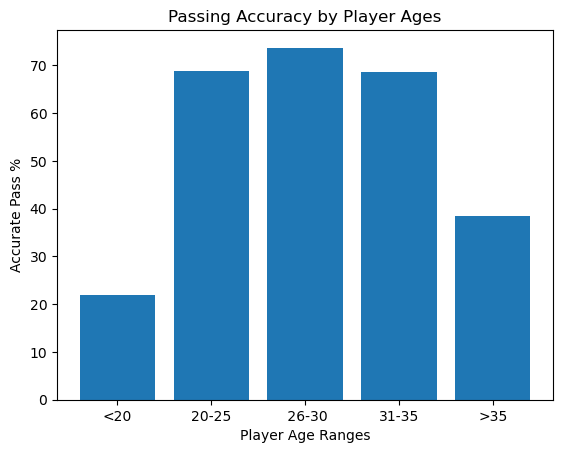

154
272
136
98
8


In [26]:
player_mean_df = round((player_df.groupby(['Age Range']).mean().reset_index()), 2)

plt.bar(player_mean_df['Age Range'], player_mean_df['Pass %'])

plt.title('Passing Accuracy by Player Ages')
plt.xlabel('Player Age Ranges')
plt.ylabel('Accurate Pass %')

plt.savefig('output/Ages_v_Passing')
plt.show()

player_sum(player_df, labels)

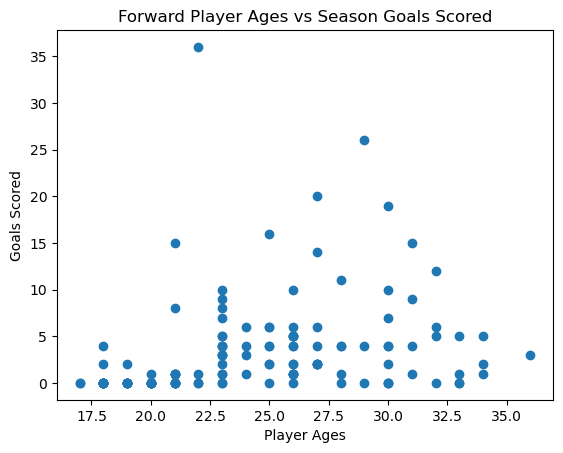

In [11]:
plt.scatter(forwards['Player Age'], forwards['Goals'])

plt.title('Forward Player Ages vs Season Goals Scored')
plt.xlabel('Player Ages')
plt.ylabel('Goals Scored')

plt.show()

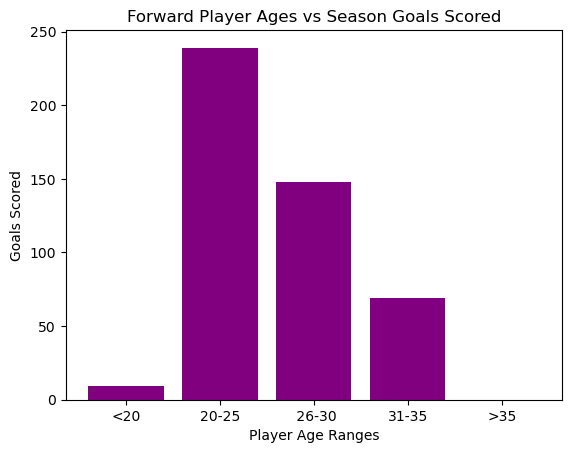

27
59
25
16
0


In [23]:
forwards = forwards.sort_values(by='Player Age')
goals_scored_df = forwards.groupby(['Age Range']).sum().reset_index()

plt.bar(goals_scored_df['Age Range'], goals_scored_df['Goals'], color='purple')

plt.title('Forward Player Ages vs Season Goals Scored')
plt.xlabel('Player Age Ranges')
plt.ylabel('Goals Scored')

plt.savefig('output/Ages_v_Goals_Bar')
plt.show()
player_sum(forwards, labels)

In [ ]:
# England Premier League Events Data

start = '2022-08-06'
end = '2023-05-09'
action = f'action=get_events&from={start}&to={end}&league_id={league}'
url = f'https://apiv3.apifootball.com/?{action}{api_key}'

games_response = requests.get(url).json()
games_response

# Index 145 is when statistics start to get added, round 17 in the league's season

In [ ]:
# Dataframe for games
games_data = []

for i, game in enumerate(games_response):
    match_id = games_response[i]['match_id']
    date = games_response[i]['match_date']
    home_team = games_response[i]['match_hometeam_name']
    away_team = games_response[i]['match_awayteam_name']
    home_team_formation = games_response[i]['match_hometeam_system']
    away_team_formation = games_response[i]['match_awayteam_system']
    home_team_score = games_response[i]['match_hometeam_score']
    away_team_score = games_response[i]['match_awayteam_score']
    
    home_team_free_kicks = ''
    away_team_free_kicks = ''
    home_team_goal_kicks = ''
    away_team_goal_kicks = ''
    home_team_shots_total = ''
    away_team_shots_total = ''
    home_team_shots_on_goal = ''
    away_team_shots_on_goal = ''
    home_team_shots_off_goal = ''
    away_team_shots_off_goal = ''
    
    for statistics in game['statistics']:
        if statistics['type'] == 'Free Kick':
            home_team_free_kicks = statistics['home']
            away_team_free_kicks = statistics['away']
        if statistics['type'] == 'Goal Kick':
            home_team_goal_kicks = statistics['home']
            away_team_goal_kicks = statistics['away']
        if statistics['type'] == 'Shots Total':
            home_team_shots_total = statistics['home']
            away_team_shots_total = statistics['away']
        if statistics['type'] == 'Shots On Goal':
            home_team_shots_on_goal = statistics['home']
            away_team_shots_on_goal = statistics['away']
        if statistics['type'] == 'Shots Off Goal':
            home_team_shots_off_goal = statistics['home']
            away_team_shots_off_goal = statistics['away']
        
    games_data.append({
        'Match ID':match_id,
        'Date':date,
        'Home Team':home_team,
        'Home Team: Score':home_team_score,
        'Home Team: Formation':home_team_formation,
        'Home Team: Free Kicks':home_team_free_kicks,
        'Home Team: Goal Kicks':home_team_goal_kicks,
        'Home Team: Shots Total':home_team_shots_total,
        'Away Team':away_team,
        'Away Team: Score':away_team_score,
        'Away Team: Formation':away_team_formation,
        'Away Team: Free Kicks':away_team_free_kicks,
        'Away Team: Goal Kicks':away_team_goal_kicks,
        'Away Team: Shots Total':away_team_shots_total
    })

# Due to formatting all values in DataFrame are currently strings
games_df = pd.DataFrame(games_data)
games_df